In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.stats import norm

In [7]:
def gaussian_update(data, prior_mu, prior_var):
    mu = np.linspace(prior_mu - 3 * np.sqrt(prior_var), prior_mu + 3 * np.sqrt(prior_var), 500)

    prior = norm.pdf(mu, loc=prior_mu, scale=np.sqrt(prior_var))

    sample_mean = np.mean(data)
    likelihood = np.exp(-len(data) / (2 * prior_var) * (mu - sample_mean) ** 2)

    posterior = prior * likelihood
    posterior /= simpson(posterior, mu)

    return mu, prior, posterior, likelihood

data : [1.25385549 2.15639133 1.4230505  1.06852448 2.11482038]


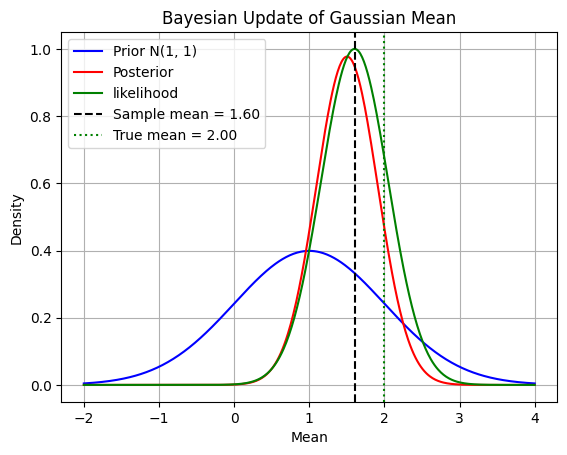

In [8]:
true_mean = 2
data = np.random.normal(true_mean, 1, size=5)

print(f'data : {data}')

prior_mean, prior_var = 1, 1
mu, prior, posterior, likelihood = gaussian_update(data, prior_mean, prior_var)

plt.plot(mu, prior, 'b-', label=f'Prior N({prior_mean}, {prior_var})')
plt.plot(mu, posterior, 'r-', label='Posterior')
plt.plot(mu, likelihood, 'g-', label='likelihood')
plt.axvline(np.mean(data), color='k', linestyle='--', label=f'Sample mean = {np.mean(data):.2f}')
plt.axvline(true_mean, color='g', linestyle=':', label=f'True mean = {true_mean:.2f}')
plt.title('Bayesian Update of Gaussian Mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()

plt.grid(True)
plt.show()

In [12]:
print(f'prior normalization {simpson(prior, mu)}')
print(f'posterior normalization {simpson(posterior, mu)}')
print(f'likelihood normalization {simpson(likelihood, mu)}')

prior normalization 0.9973002038473372
posterior normalization 1.0
likelihood normalization 1.1209981964051505
